Build a K-means mode



Step 1: Imports
Import statements including K-means, silhouette_score, and StandardScaler

In [92]:
# Imported standard operational packages.
import numpy as np
import pandas as pd

# Imported tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Imported visualization packages.
import seaborn as sns

Read the CSV file

In [93]:
df = pd.read_csv(r"C:\Users\Arun\Documents\unsupervised_income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Plotting the scatterplot WITHOUT scaling and clusting the features.

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


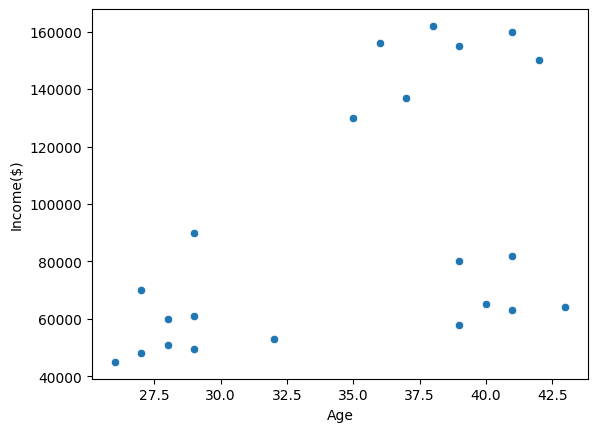

In [94]:
plot = sns.scatterplot(x= df['Age'], y= df['Income($)'])

From above scatterplot we could assume the optimal k value could be 3. 

In [95]:
km = KMeans(n_clusters=3, random_state= 42)
df["cluster"] = km.fit_predict(x_scaled)
km

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

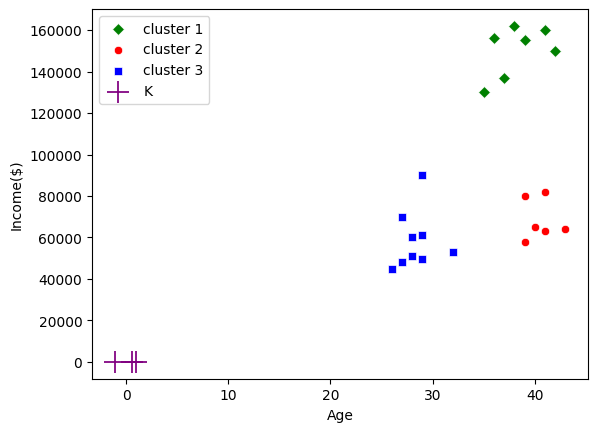

In [96]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plot = sns.scatterplot(x= df1["Age"], y= df1["Income($)"], marker="D", color = "green", label="cluster 1")
plot = sns.scatterplot(x= df2["Age"], y= df2["Income($)"], marker="o", color = "red", label="cluster 2")
plot = sns.scatterplot(x= df3["Age"], y= df3["Income($)"], marker="s", color = "blue", label="cluster 3")

plot =sns.scatterplot(x= km.cluster_centers_[:,0],y= km.cluster_centers_[:,1], marker="+", color = "purple", label="K", s=250)

The data needs to be scale. so that it could perfectly fit in the plot without wrong clustring

Let's scale the data with the help of StandardScaler.
Note:- We can also use MinMaxScaler. but before that make sure you imported them like this : from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = StandardScaler()
df[["Age","Income($)"]] = scaler.fit_transform(df[["Age","Income($)"]])
x_scaled=df.drop(['Name'], axis =1)
x_scaled.head()


,Age,Income($),cluster
0,-1.356055,-0.480684,2
1,-1.009157,-0.010159,2
2,-1.009157,-0.692421,2
3,-1.182606,-0.715947,2
4,1.245679,1.401417,0


Finding the optimal K by using inertia 

Here I used num_clusters =range(2,11). But we can also do this with list comprensation like this: num_clusters =[ i for i in range(2,11)]

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Text(0, 0.5, 'Sum of squared distance')

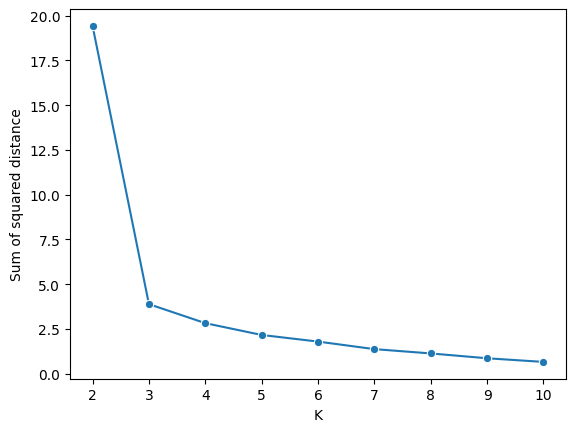

In [98]:
inertia=[]
num_clusters =range(2,11)

def kmeansinertia(num_clusters, x_vals):
    for k in num_clusters:
        kms = KMeans(n_clusters=k, random_state= 42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

inertia = kmeansinertia(num_clusters, x_scaled)

plot = sns.lineplot(x= num_clusters, y= inertia, marker="o")
plot.set_xlabel("K")
plot.set_ylabel("Sum of squared distance")

From above elbow plot we can clearly see 3 is optimal k value. 

Nevertheless lets double checkit with silhouette_score

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Text(0, 0.5, 'means of sil coefficients')

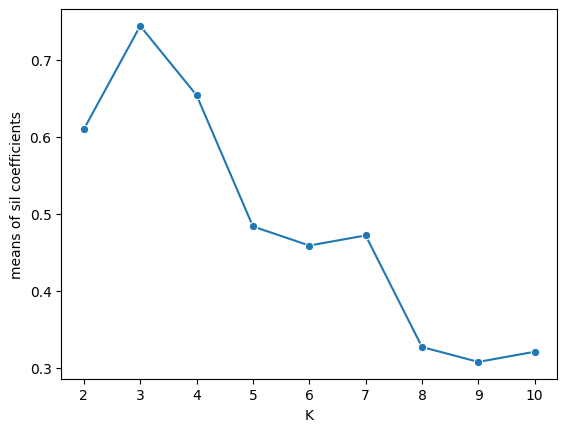

In [99]:
sil_score=[]

def kmeanssil_score(num_clusters, x_vals):
    for k in num_clusters:
        kms = KMeans(n_clusters=k, random_state= 42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

sil_score = kmeanssil_score(num_clusters, x_scaled)

plot = sns.lineplot(x= num_clusters, y= sil_score, marker="o")
plot.set_xlabel("K")
plot.set_ylabel("means of sil coefficients")

Our assumtion is correct both the elbow plot and silhouette plot saying 3 is optimal value for k

Now we give 3 in clusters

In [100]:
km = KMeans(n_clusters=3, random_state=42)
df["cluster"] = km.fit_predict(x_scaled)
km

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

Lets see the centroids of each cluster.

In [101]:
km.cluster_centers_

array([[ 0.98550535, -0.51205261,  1.        ],
       [-1.1247901 , -0.74862223,  2.        ],
       [ 0.60143983,  1.40141653,  0.        ]])

C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

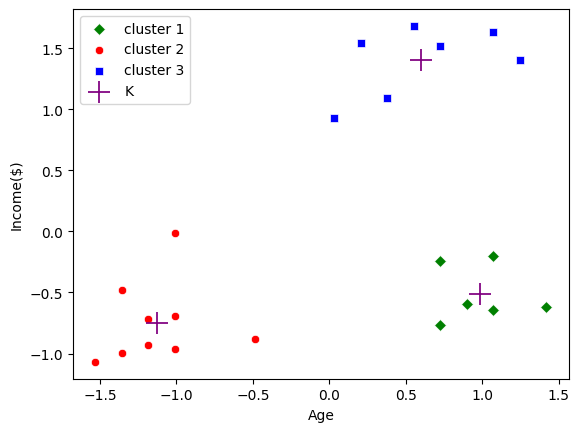

In [102]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plot = sns.scatterplot(x= df1["Age"], y= df1["Income($)"], marker="D", color = "green", label="cluster 1")
plot = sns.scatterplot(x= df2["Age"], y= df2["Income($)"], marker="o", color = "red", label="cluster 2")
plot = sns.scatterplot(x= df3["Age"], y= df3["Income($)"], marker="s", color = "blue", label="cluster 3")

plot =sns.scatterplot(x= km.cluster_centers_[:,0],y= km.cluster_centers_[:,1], marker="+", color = "purple", label="K", s=250)

Finally we did it :-)

The scatterplot clearly showing the age is matter to earn high income still we could see the cluster1 is earing less despite of older age.
